In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Carregar os dados e configurar a coluna 'classe' como categórica
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Separar as features (X) e o target (y)
X = vinhos.drop('classe', axis=1)
y = vinhos['classe']


In [2]:
def avaliar_knn_kfold(X, y, k, n_splits=10, random_state=None):
    """
    Avalia o desempenho do modelo KNN usando K-Fold Cross-Validation.

    Parâmetros:
    - X: DataFrame com as features.
    - y: Série com o target.
    - k: Número de vizinhos para o KNN.
    - n_splits: Número de divisões do K-Fold.
    - random_state: Semente para o shuffle no K-Fold.

    Retorna:
    - mean_accuracy: Média das acurácias nos folds.
    - std_accuracy: Desvio padrão das acurácias nos folds.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treinar o modelo KNN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Avaliar o modelo
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    # Retornar média e desvio padrão das acurácias
    return np.mean(accuracies), np.std(accuracies)


In [3]:
# Configurações para os experimentos
random_states = [42, 17, 24]
ks = [3, 5]
resultados = []

# Loop pelos random_states e valores de k
for random_state in random_states:
    for k in ks:
        mean_accuracy, std_accuracy = avaliar_knn_kfold(X, y, k=k, n_splits=10, random_state=random_state)
        resultados.append({
            'random_state': random_state,
            'k': k,
            'mean_accuracy': mean_accuracy,
            'std_accuracy': std_accuracy
        })

# Criar um DataFrame para os resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar os resultados
print(resultados_df)


   random_state  k  mean_accuracy  std_accuracy
0            42  3       0.703595      0.139187
1            42  5       0.664052      0.100075
2            17  3       0.698693      0.104030
3            17  5       0.687582      0.112118
4            24  3       0.712745      0.096816
5            24  5       0.712745      0.093973


In [4]:
# Identificar o melhor resultado para cada random_state
melhores_resultados = resultados_df.loc[resultados_df.groupby('random_state')['mean_accuracy'].idxmax()]

print("\nMelhores resultados por random_state:")
print(melhores_resultados)



Melhores resultados por random_state:
   random_state  k  mean_accuracy  std_accuracy
2            17  3       0.698693      0.104030
4            24  3       0.712745      0.096816
0            42  3       0.703595      0.139187


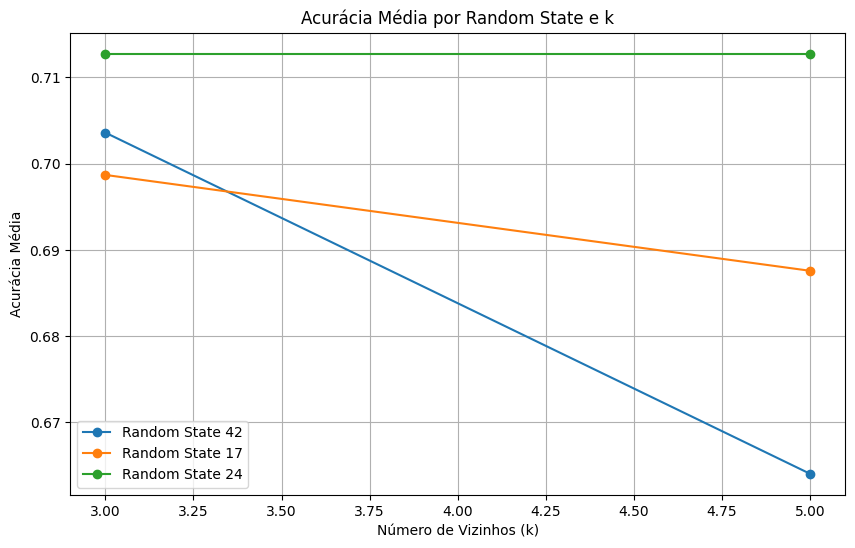

In [5]:
import matplotlib.pyplot as plt

# Gráfico comparando as acurácias médias para diferentes random_states e k
plt.figure(figsize=(10, 6))
for random_state in random_states:
    subset = resultados_df[resultados_df['random_state'] == random_state]
    plt.plot(subset['k'], subset['mean_accuracy'], marker='o', label=f'Random State {random_state}')

plt.title('Acurácia Média por Random State e k')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia Média')
plt.legend()
plt.grid()
plt.show()
